In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('./diamonds.csv')

# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    diamonds[var] = diamonds[var].astype(ordered_var)

## Explanatory Polishing

In this workbook, I'll polish two plots from the earlier exploration so that they can be presented to others in an understandable form.

The first plot to polish depicts the base relationship between price and carat. Make additions and revisions to the code below to refine the given plot.

### price against carat weight

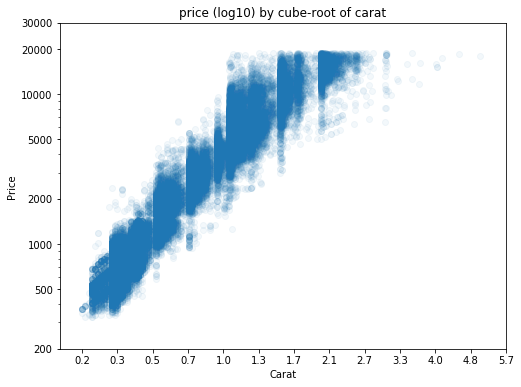

In [2]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3
    
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

plt.figure(figsize = [8, 6])

plt.scatter(data = diamonds, x = 'cr_carat', y = 'price', alpha=1/20)

plt.xlabel('Carat')
plt.ylabel('Price')

plt.yscale('log')

y_ticks = [200, 500, 1000, 2000, 5000, 10000, 20000, 30000]
plt.yticks(y_ticks, y_ticks)

tick_locs = np.arange(cuberoot_trans(diamonds['carat'].min()), cuberoot_trans(diamonds['carat'].max())+0.1, 0.1)
plt.xticks(tick_locs, np.round(cuberoot_trans(tick_locs, inverse = True), 1))

plt.title('price (log10) by cube-root of carat')
plt.show()

The second plot that you will polish is a multivariate plot of price against levels of color and cut, for diamonds of about 1 carat weight. Make additions and revisions to the code below to refine the given plot.

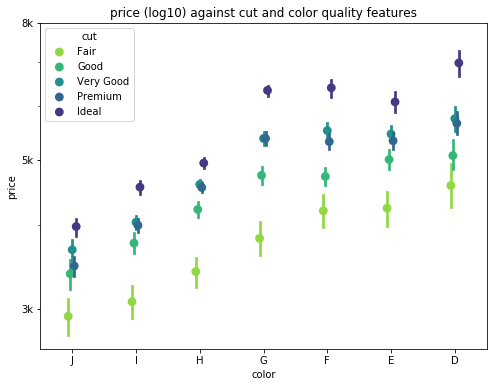

In [5]:
plt.figure(figsize = [8,6])
small_diamonds = diamonds[(0.8 < diamonds.carat) & (diamonds.carat < 1.2)]

ax = sns.pointplot(data=small_diamonds, x='color', y='price', 
                  hue='cut', # add the third variable
                  dodge=True, # prevent overlapping
                  linestyles='',
                  palette='viridis_r')
plt.yscale('log')
plt.title('price (log10) against cut and color quality features')
plt.yticks([3000, 5000, 8000], ['3k', '5k', '8k'])
ax.set_yticklabels([], minor = True)
plt.show();